<a href="https://colab.research.google.com/github/EitanRashkovan/python-playground/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
!pip uninstall emoji
!pip install emoji==1.7
!pip install emoji-unicode
import emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 4.9 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=2ebcbebfe2036132ad10c5fdc3da9a18c0cc8d938814177456111b91e6a440ba
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for emoji-unicode: filename=emoji_unicode-0.4-py3-none-any.whl size=35551 sha256=a8dc09fab0d5c9569dd4db4eb32a9732c847903b0f5806de5d878b11edc77308
  Stored in directory: /root/.cache/pip/wheels/a3/8b/a7/6a8cbfe4e8ae727c1de49591f7b7442aade5794777376de3e0
Successfully built emoji-unicode


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

%cd "/content/drive/Shared drives/197"

/content/drive/Shared drives/197


In [ ]:
df = pd.read_csv("twitter_clean.csv", lineterminator='\n')

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,location_known
0,5396,5396,True,False,Behind every argument is someone's ignorance. ...,24,0,35,False,200,False,0.155,1287,bot,False
1,8671,8671,True,False,#RatesTrading #FuturesTrading #Options #Stocks...,145,44,202,False,313,False,0.273,1148,bot,True
2,1733,1733,True,False,Come to my site 🧡🧡🧡 https://t.co/SZF33v4Euh,319,10,0,False,55,False,0.016,3346,bot,True
3,24819,24819,False,False,Do you like fast? Come in! 😻😻😻 https://t.co/NP...,80,1,0,False,14,False,0.005,2667,bot,True
4,4622,4622,False,False,Model / DC fan. Waiting you at https://t.co/Wo...,226,200,0,True,521,False,0.174,2987,bot,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16407,37430,37430,True,False,"Mom, safety professional, chemistry nerd, beer...",6365,77,226,True,788,False,0.499,1580,human,False
16408,37431,37431,False,False,"MD & Chairman,ThinkInk Picturez WRITER/DIRECTO...",24720,85561,2579,True,21468,False,5.580,3847,human,False
16409,37433,37433,True,False,"Role: Stock Taker. Past Roles: Nanny, Sales As...",651,139,1105,False,340,False,0.084,4028,human,False
16410,37434,37434,False,False,KINGDOM LANDLORD #FreeCornBread,8839,1121486,605,True,24970,True,8.976,2782,human,True


In [ ]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1, inplace=True)
df["account_type"].replace({"bot": 1, "human": 0}, inplace=True)
df.rename(columns = {'account':'team_name', 'points':'points_scored'}, inplace = True)


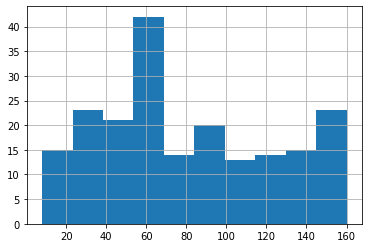

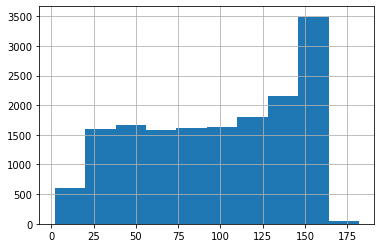

In [ ]:
df['length'] = df['description'].apply(len)
df2= df.loc[df['account_type'] == 'bot']

df3 = df.loc[df['account_type'] == 'human']

df2['length'].hist()
plt.show()

df3['length'].hist()
plt.show()

In [ ]:
def text_has_emoji(text):
    for character in text:
        if character in emoji.UNICODE_EMOJI:
            return True
    return False

In [ ]:
df['contains_emoji'] = df['description'].apply(text_has_emoji)
df['contains_tag'] = df.description.str.contains('#')
df['contains_at'] = df.description.str.contains('@')
df['contains_link'] = df.description.str.contains('https')

In [ ]:
df.drop(['description'],axis=1, inplace=True)

In [ ]:
df_bot = df.loc[df['account_type'] == 'bot']
df_human = df.loc[df['account_type'] == 'human']


In [ ]:
# create testing, training, and validation 
X_train, X_test= train_test_split(df_human, train_size=0.8, test_size=0.2)

In [ ]:
X_train, X_valid = train_test_split(X_train, train_size=0.8, test_size=0.2)
X_test = pd.concat([X_train, df_bot])

In [ ]:
len(X_train)

10375

In [ ]:
len(X_test)

3243

In [ ]:
len(X_valid)

2594

In [ ]:
import tensorflow as tf
import seaborn as sns
import random as rn

# manual parameters
RANDOM_SEED = 789
TRAINING_SAMPLE = 200000
VALIDATE_SIZE = 0.2

# setting random seeds for libraries to ensure reproducibility
np.random.seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)
tf.set_random_seed(RANDOM_SEED)


In [ ]:
# manual parameter 
RATIO_TO_FRAUD = 20

# concatenate with fraud transactions into a single dataframe
visualisation_initial = pd.concat([df_human, df_bot])
column_names = list(visualisation_initial.drop('account_type', axis=1).columns)

# isolate features from labels 
features, labels = visualisation_initial.drop('account_type', axis=1).values, \
                   visualisation_initial.label.values